# Scenario 3

In [1]:
import pandas as pd
import numpy as np

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
df = pd.read_pickle(r'experiment.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.



In [2]:
df.reset_index(inplace = True)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
0,6,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,4,0,0,0,1,6,1
1,12,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,4,0,0,0,1,6,2
2,18,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474307,4,0,0,0,1,6,3
3,24,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474332,4,0,0,0,1,6,4
4,30,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474426,4,0,0,0,1,6,5


In [4]:
from model.config import *

running file: sim_setup.py
end of file: sim_setup.py


In [5]:
experiment = simulation_config

In [9]:
for i in experiment:
    print(i['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4))

0.0000
0.0050


In [10]:
import matplotlib.pyplot as plt
from model.parts.portfolio import Portfolio

In [11]:
for i in df[df['subset'] == 0]['delegator_portfolios']:
    if i != {} and 1 in i:
        print(i[1].indexer_in_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        print(0)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [12]:
diff_params_dfs = {}
for i in df['subset'].unique():
    diff_params_dfs[i] = df[df['subset'] == i]
delegator_values_df = {}
for i in diff_params_dfs.keys():
    delegator_values_df[i] = {}
    portfolios = diff_params_dfs[i]['delegator_portfolios']
    timestep = 0
    for j in portfolios:
        for delegator_id, values in j.items():
            if delegator_id not in delegator_values_df[i]:
                delegator_values_df[i][delegator_id] = {}
            delegator_values_df[i][delegator_id][timestep] = values
        timestep += 1
    delegator_values_df[i] = pd.DataFrame(delegator_values_df[i])

    for j in delegator_values_df[i].columns:
        delegator_values_df[i][j] = [Portfolio(j) if k != k else k for k in delegator_values_df[i][j]]

delegator_values_df[0][1].tail()
    
# for i in diff_params_dfs.keys():
#     holdings_list = []
#     for j, values in diff_params_dfs[i].items():
#         holdings_list.append(values.holdings)
#         plt.plot(diff_params_dfs[i].timestep, holdings_list)
#         plt.title('GRT Holdings of Front Running Delegator')

1524    <class 'model.parts.portfolio.Portfolio'>: {'i...
1525    <class 'model.parts.portfolio.Portfolio'>: {'i...
1526    <class 'model.parts.portfolio.Portfolio'>: {'i...
1527    <class 'model.parts.portfolio.Portfolio'>: {'i...
1528    <class 'model.parts.portfolio.Portfolio'>: {'i...
Name: 1, dtype: object

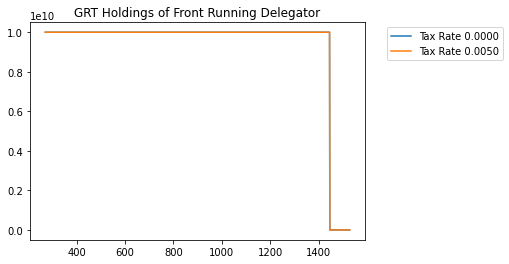

In [14]:
for i,j in enumerate(experiment):
    plot_df = delegator_values_df[i]
    holdings_list = []
    # label_one = j['M']['delegation_unbonding_period_epochs']
    label_two = j['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
    for i, values in delegator_values_df[i][1].items():
        holdings_list.append(values.holdings)
    plt.plot(plot_df.index, holdings_list, 
            label = f'Tax Rate {label_two}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('GRT Holdings of Front Running Delegator')

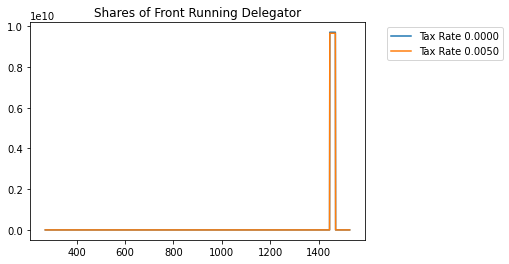

In [15]:
for i,j in enumerate(experiment):
    plot_df = delegator_values_df[i]
    shares_list = []
    # label_one = j['M']['delegation_unbonding_period_epochs']
    label_two = j['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
    for k, values in delegator_values_df[i][1].items():
        if values.indexer_shares != {}:
            shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            shares_list.append(0)
    plt.plot(plot_df.index, shares_list, 
            label = f'Tax Rate {label_two}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Shares of Front Running Delegator')

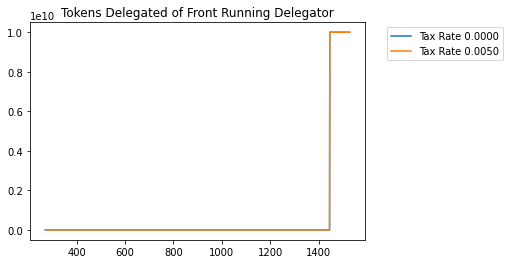

In [17]:
for i,j in enumerate(experiment):
    plot_df = delegator_values_df[i]
    input_tokens_list = []
    label_two = j['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
    for i, values in delegator_values_df[i][1].items():
        if values.indexer_shares != {}:
            input_tokens_list.append(values.indexer_in_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            input_tokens_list.append(0)
    plt.plot(plot_df.index, input_tokens_list, 
            label = f'Tax Rate {label_two}')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    # plt.ylim(9.5E9, 1.2E10)
    plt.title('Tokens Delegated of Front Running Delegator')

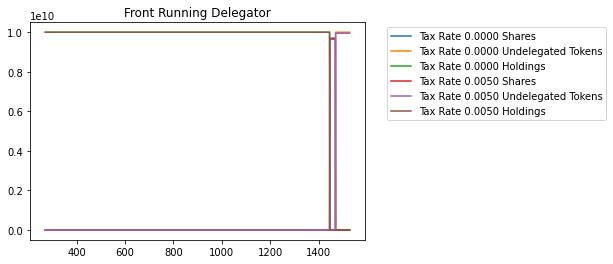

In [19]:
for i,j in enumerate(experiment):
    plot_df = delegator_values_df[i]
    shares_list = []
    indexer_locked_list = []
    holdings_list = []
    # label_one = j['M']['delegation_unbonding_period_epochs']
    label_two = j['M']['delegation_tax_rate'].quantize(Decimal(10) ** -4)
    for i, values in delegator_values_df[i][1].items():
        if values.indexer_shares != {}:
            shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            shares_list.append(0)
        if values.indexer_locked_tokens != {}:
            indexer_locked_list.append(values.indexer_locked_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
        else:
            indexer_locked_list.append(0)
        if values.holdings != {}:
            holdings_list.append(values.holdings)
        else:
            holdings_list.append(0)            
    plt.plot(plot_df.index, shares_list, 
            label = f'Tax Rate {label_two} Shares')
    plt.plot(plot_df.index, indexer_locked_list, 
            label = f'Tax Rate {label_two} Undelegated Tokens')
    plt.plot(plot_df.index, holdings_list, 
            label = f'Tax Rate {label_two} Holdings')
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
    plt.title('Front Running Delegator')